# ResNet analysis

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from scipy import stats
first2=np.load('first_two_models.npy')
res_arr= np.append(first2,[[[83.4, 97.7, 89.8, 66.2, 86.6, 82.5, 88.9, 90.6, 91.1, 93.4],
  [89.4, 97.5, 86.0, 87.7, 84.8, 84.2, 95.6, 93.4, 96.5, 97.5],
  [96.5, 98.0, 87.4, 90.2, 92.0, 91.4, 96.7, 87.4, 94.4, 96.3],
  [90.5, 95.5, 90.3, 83.6, 89.2, 82.6, 93.3, 96.6, 95.9, 95.3],
  [94.1, 96.8, 89.6, 82.4, 93.0, 74.9, 96.7, 92.8, 94.9, 95.3],
  [94.2, 96.8, 83.4, 90.4, 96.6, 88.0, 93.5, 96.0, 95.6, 97.6],
  [93.2, 96.1, 88.4, 94.8, 92.7, 87.7, 93.2, 93.6, 95.4, 96.2],
  [93.1, 95.8, 91.0, 94.4, 92.7, 88.2, 92.2, 94.6, 99.3, 93.9],
  [94.2, 97.2, 89.0, 92.2, 90.5, 92.7, 97.1, 95.8, 95.5, 92.8],
  [94.9, 97.3, 91.9, 82.7, 94.8, 88.2, 96.3, 94.0, 97.2, 98.2]]]) #shape(3,10,10) #all three lists

In [2]:
def calc_significance(df):

    list1=df['trials_avg'][:10]
    list2=df['trials_avg'][10:20]
    list3=df['trials_avg'][20:]
    result_12=stats.ttest_ind(list1,list2)[1]
    result_13=stats.ttest_ind(list1,list3)[1]
    result_23=stats.ttest_ind(list2,list3)[1]
    p_val_ls=[result_12,result_13,result_23]
    return p_val_ls


In [77]:
res_df=pd.DataFrame(res_arr.reshape(30,-1),columns=('plane','car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck'))
res_df['trials_avg']=res_df.apply(np.mean, axis = 1) 
res_df=res_df.assign(index_type=np.ones(res_df.shape[0]))

for i in range(res_df.shape[0]):
    if i<10:
        res_df.index_type.iloc[i]='ResNet3'
    elif i>=10 and i<20:
        res_df.index_type.iloc[i]='Original ResNet'
    elif i>=20 and i<30:
        res_df.index_type.iloc[i]='ResNet5'
res_df=res_df.set_index('index_type')
# res_df
# res_df.to_csv('resnet_modification.csv')
# resnet3=res_df.loc['ResNet3',:]
# resnet4=res_df.loc['ResNet',:]
calc_significance(res_df)
# resnet3
orig_res_df=res_df.iloc[:10,:]
orig_res_df
res_mean=np.array(orig_res_df.mean())[10]
res_mean

92.11600000000001

# VGG analysis

In [76]:
vgg_arr=np.load('all_accuracy_arr.npy')
vgg_arr_2=np.load('all_accuracy_arr_2.npy')
vgg_arr=np.append(vgg_arr, vgg_arr_2)
# vgg_arr_2
vgg_df=pd.DataFrame(vgg_arr.reshape(40,-1),columns=('plane','car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck'))
vgg_df['trials_avg']=vgg_df.apply(np.mean, axis = 1) 
vgg_df=vgg_df.assign(index_type=np.ones(vgg_df.shape[0]))
vgg_df

for i in range(vgg_df.shape[0]):
    if i<10:
        vgg_df.index_type.iloc[i]='VGG/Original VGG'
    elif i>=10 and i<20:
        vgg_df.index_type.iloc[i]='delete'
    elif i>=20 and i<30:
         vgg_df.index_type.iloc[i]='VGG3'
    elif i>=30 and i<40:
         vgg_df.index_type.iloc[i]='VGG2'
vgg_df=vgg_df.set_index('index_type').drop(index='delete')
orig_vgg_df=vgg_df.iloc[:10,:]
orig_vgg_df
vgg_mean=np.array(orig_vgg_df.mean())[10]
vgg_mean
# calc_significance(vgg_df)

88.724

In [18]:
vgg_df.to_csv('vggnet_modification.csv')

In [40]:
p_ls=np.array([[0.757725032886463, 0.9669513341351772, 0.7772078607647108],
     [0.8008577422589552,0.8396950397839218,0.46388143963208406]])
p_df=pd.DataFrame(p_ls.reshape(2,-1), columns=['p-val: 1st vs. 2nd net', 'p-val: 1st vs. 3rd net',
                                               'p-val: 2nd vs. 3rd net'],
                 index=['ResNet','VGG'])
p_df

,p-val: 1st vs. 2nd net,p-val: 1st vs. 3rd net,p-val: 2nd vs. 3rd net
ResNet,0.757725,0.966951,0.777208
VGG,0.800858,0.839695,0.463881


# RegNet analysis 

In [70]:
reg_arr=np.array([[[87.2, 97.1, 79.9, 57.0, 83.1, 92.6, 95.9, 87.1, 95.0, 93.1],
  [91.8, 98.5, 87.9, 86.1, 89.1, 84.5, 93.7, 97.4, 91.3, 95.5],
  [86.9, 90.8, 80.7, 80.2, 93.8, 91.1, 88.9, 94.1, 97.3, 98.4],
  [95.8, 97.6, 85.8, 83.4, 92.1, 89.5, 95.7, 92.9, 95.8, 95.3],
  [93.4, 98.3, 90.6, 79.1, 90.2, 83.3, 94.6, 93.9, 94.9, 94.5],
  [95.5, 98.0, 87.8, 88.5, 94.2, 89.8, 99.3, 93.7, 89.9, 99.6],
  [97.1, 97.5, 90.4, 87.8, 93.5, 78.2, 93.7, 94.3, 95.3, 95.3],
  [95.2, 99.4, 84.0, 85.8, 90.7, 88.9, 96.6, 92.3, 94.0, 95.8],
  [95.4, 95.3, 91.3, 87.4, 95.4, 88.4, 93.9, 88.6, 98.1, 94.1],
  [93.3, 97.5, 87.9, 75.4, 87.3, 93.3, 92.1, 96.3, 94.5, 97.0]],
 [[89.3, 96.3, 68.2, 54.8, 87.8, 82.0, 84.6, 83.5, 89.7, 88.6],
  [88.7, 92.0, 78.9, 69.5, 85.0, 77.3, 94.3, 93.5, 95.4, 95.8],
  [92.7, 95.6, 75.5, 78.6, 90.3, 80.9, 94.4, 93.8, 96.2, 97.0],
  [93.2, 93.1, 84.2, 79.2, 91.4, 86.4, 95.0, 92.0, 96.0, 93.2],
  [92.8, 96.9, 87.6, 79.9, 89.9, 88.5, 94.7, 92.0, 93.5, 91.4],
  [95.6, 98.0, 84.3, 80.6, 91.0, 81.8, 92.7, 94.0, 96.1, 96.6],
  [93.9, 96.7, 89.5, 78.9, 93.9, 91.1, 93.4, 91.3, 96.1, 97.0],
  [96.0, 96.2, 85.7, 83.5, 93.2, 88.8, 97.1, 89.9, 96.7, 94.5],
  [94.2, 97.5, 89.5, 78.7, 90.9, 87.9, 95.7, 93.4, 94.4, 96.2],
  [93.3, 96.1, 87.5, 84.3, 90.4, 88.6, 97.3, 92.1, 97.0, 96.6]]])
reg_df=pd.DataFrame(reg_arr.reshape(20,-1),columns=('plane','car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck'))
reg_df['trials_avg']=reg_df.apply(np.mean, axis = 1) 
reg_df=reg_df.assign(opt_func=np.ones(reg_df.shape[0]))
for i in range(reg_df.shape[0]):
    if i<10:
        reg_df.opt_func.iloc[i]='RegNet_SGD'
    elif i>=10 and i<20:
        reg_df.opt_func.iloc[i]='RegNet_Adam'
reg_df=reg_df.set_index('opt_func')
reg_df.to_csv('regnet_opt_func.csv')
reg_df

,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,trials_avg
opt_func,,,,,,,,,,,
RegNet_SGD,87.2,97.1,79.9,57.0,83.1,92.6,95.9,87.1,95.0,93.1,86.80
RegNet_SGD,91.8,98.5,87.9,86.1,89.1,84.5,93.7,97.4,91.3,95.5,91.58
RegNet_SGD,86.9,90.8,80.7,80.2,93.8,91.1,88.9,94.1,97.3,98.4,90.22
RegNet_SGD,95.8,97.6,85.8,83.4,92.1,89.5,95.7,92.9,95.8,95.3,92.39
RegNet_SGD,93.4,98.3,90.6,79.1,90.2,83.3,94.6,93.9,94.9,94.5,91.28
RegNet_SGD,95.5,98.0,87.8,88.5,94.2,89.8,99.3,93.7,89.9,99.6,93.63
RegNet_SGD,97.1,97.5,90.4,87.8,93.5,78.2,93.7,94.3,95.3,95.3,92.31
RegNet_SGD,95.2,99.4,84.0,85.8,90.7,88.9,96.6,92.3,94.0,95.8,92.27
RegNet_SGD,95.4,95.3,91.3,87.4,95.4,88.4,93.9,88.6,98.1,94.1,92.79


In [47]:
p_val=stats.ttest_ind(reg_arr[0],reg_arr[1])[1]
p_val

array([0.88970456, 0.24786024, 0.17756551, 0.30775721, 0.69927774,
       0.21517497, 0.72110148, 0.29404908, 0.63684002, 0.29680053])

In [61]:
reg_ls1=reg_arr[0].tolist()
reg_ls1=[val for lst in reg_arr[0].tolist() for val in lst]
reg_ls2=[val for lst in reg_arr[1].tolist() for val in lst]

1.0

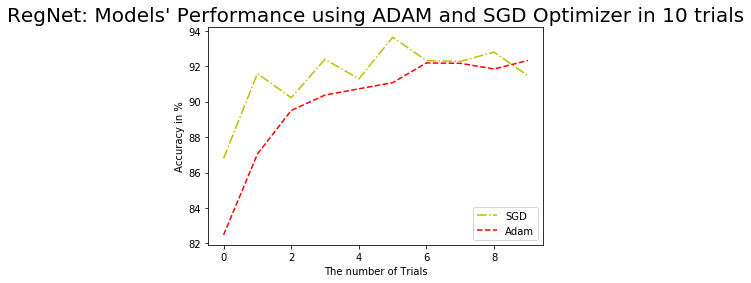

In [79]:
import matplotlib.pyplot as plt
df=pd.read_csv('regnet_opt_func.csv')
# df['RegNet_SGD']
df=df.set_index('opt_func')
SGD=np.array(df.loc['RegNet_SGD']['trials_avg'])
ADAM=np.array(df.loc['RegNet_Adam']['trials_avg'])
ADAM=np.array([[i,ADAM[i]] for i in range(len(ADAM))])
SGD=np.array([[i,SGD[i]] for i in range(len(SGD))])
ax=plt.plot(SGD[:,0],SGD[:,1], 'y-.',label='SGD' )
ax2=plt.plot(ADAM[:,0],ADAM[:,1],'r--',label='Adam')
plt.xlabel("The number of Trials")
plt.ylabel("Accuracy in %")
# my_xticks = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
# plt.xticks(x, my_xticks, fontsize=16)
plt.title("RegNet: Models' Performance using ADAM and SGD Optimizer in 10 trials",fontsize=20)
plt.legend(loc="lower right")
plt.show()

91.473


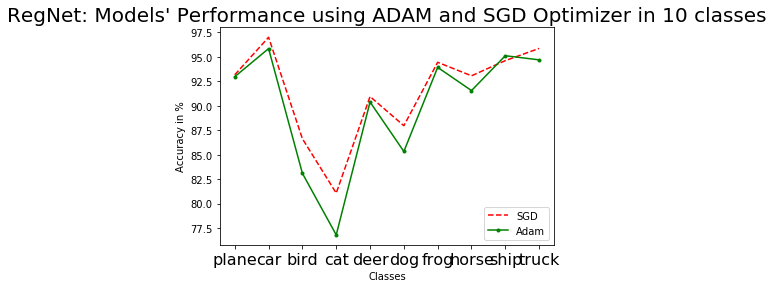

In [80]:
import matplotlib.pyplot as plt
df_sgd=df.iloc[:10,:]
sgd_class_mean=np.array(df_sgd.mean()[:10])
sgd_avg_mean=np.array(df_sgd.mean())[10]
print(sgd_avg_mean)
# len(sgd_class_mean)
df_adam=df.iloc[10:,:]
adam_class_mean=np.array(df_adam.mean()[:10])
x=np.arange(1,11,1)
plt.plot(x,sgd_class_mean,'r--', label='SGD')
plt.plot(x,adam_class_mean,'g.-',label='Adam')
plt.xlabel("Classes")
plt.ylabel("Accuracy in %")
my_xticks = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
plt.xticks(x, my_xticks, fontsize=16)
plt.title("RegNet: Models' Performance using ADAM and SGD Optimizer in 10 classes",fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [81]:
comp_df=pd.DataFrame(np.array([92.11600000000001,88.724,91.473]).reshape(1,-1), 
                     columns=['ResNet','VGG','RegNet'],
                    index=['Testing Accuracy in %'])
comp_df

,ResNet,VGG,RegNet
Testing Accuracy in %,92.116,88.724,91.473
